# Analysis of Aviation Accidents with NTSB Reports


## Project Objectives

-To understand the process of aviation accident reporting.

-To analyze patterns in aviation accidents based on preliminary and final reports.

-To identify common probable causes of aviation accidents.

-To visualize trends and draw insights from historical data.

## Business Understanding *

Despite advancements in safety regulations and aviation technology, aviation accidents continue to occur. They often have significant human, economic and regulatory consequences. The National Transportation and Safety Board (NTSB) provides detailed reports for aviation accidents, but the completeness and availability of the data may vary  accross time and cases. My cpmpany wants to expand to new inductries to diversify its portfolio and is interested in purchasing and operating airplanes for commercial and private enterprises.

This project aims to analyze aviation accident data reported by NTSB to:
- Identify the trends and patterns over time.
- Identify the most common probable causes of the aviation accidents.
- Compare preliminary vs. final reports to access how factual data evolves.
- Identify potential risks of the aircraft
- Provide visualizations that can also be understood by a non-technical audience


The goal of this project is to support data driven recommendations in order to determine which aircraft are the lowest risk for the company to start this new business endevor.

## Introduction


Brief overview of aviation accident reporting.

Role of the NTSB.

Importance of timely and detailed reporting.

## Methodology

**Data Source**

Our data source was provided by NTSB showing the aviation accidents

In [190]:
# Importing the various libraries that will be used in the data analysis and visualization of our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [191]:
# Importing the report from NTSB 'AviationData.csv'

df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

# Print the number of rows and columns in df for an overview of the data
print(df.shape) # There are 88889 entries and 31 columns

# Print the first five rows of df to get an insight of our data
df.head()

(88889, 31)


C:\Users\USER\AppData\Local\Temp\ipykernel_29748\2322318749.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [192]:
# Checking the last 5 rows of our DataFrame to see if it's structured all the way through

df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [193]:
# Creating an independent copy of the dataframe to avoid any issues with "views" later
df = df.copy()

# Stripping whitespace from column names to avoid any discrepancies
df.columns = df.columns.str.strip()

In [121]:
# Checking the columns in our Dataframe in order to understand what we are working with and know what columns to reference

print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [194]:
# Checking information of our data to see the rows, columns, datatypes and rows that might have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Based on the above info, we have rows with a lot of missing values such as Latitude, Longitude, Aircraft code, Aircraft Name, Aircraft Category, FAR Description, Schedule,Air Carrier and Publication Date. We will therefore have to clean this data in order for us to get a more accurate analysis.

# Summary Statistics

we will proceed to get the statistics of the aviation accidents that have occured over the years.

In [195]:
# Getting the summary statistics of the numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning
The following data cleaning steps were taken:
* Columns with too many missing values are dropped. 
* Only the relevant columns were chosen for a cleaner analysis
* Numerical relevant columns with missing values were replaced with 0
* Relevant columns with categorical data with missing values were replaced with 'Unknown'
* A new column that combined the total injuries was added



In [196]:
# To see the missing values per column in order to determine the columns to use in the analysis for easier handling and 
# cleaner analysis of the data
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [197]:
# Check percentage of missing values in the DataFrame
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

Based on the above information, some of the columns have too many missing values that could skew the data and some which are not important for the analysis, therefore we will have to select the columns to use in order to get a more accurate analysis without filtering out too much data.

In [198]:
# Convert 'Event.Date' column to datetime type
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [199]:
# Check for duplicate rows
print(df.duplicated().sum())

0


## Filtering Data to relevant columns

In [200]:
# Based on the above, we have 31 columns and we need to work with the relevant columns

Relevant_columns = ['Event.Id','Aircraft.damage','Accident.Number','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Event.Date','Purpose.of.flight','Make','Model','Engine.Type','Injury.Severity']
df = df[Relevant_columns]
df

,Event.Id,Aircraft.damage,Accident.Number,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date,Purpose.of.flight,Make,Model,Engine.Type,Injury.Severity
0,20001218X45444,Destroyed,SEA87LA080,2.0,0.0,0.0,0.0,1948-10-24,Personal,Stinson,108-3,Reciprocating,Fatal(2)
1,20001218X45447,Destroyed,LAX94LA336,4.0,0.0,0.0,0.0,1962-07-19,Personal,Piper,PA24-180,Reciprocating,Fatal(4)
2,20061025X01555,Destroyed,NYC07LA005,3.0,NaN,NaN,NaN,1974-08-30,Personal,Cessna,172M,Reciprocating,Fatal(3)
3,20001218X45448,Destroyed,LAX96LA321,2.0,0.0,0.0,0.0,1977-06-19,Personal,Rockwell,112,Reciprocating,Fatal(2)
4,20041105X01764,Destroyed,CHI79FA064,1.0,2.0,NaN,0.0,1979-08-02,Personal,Cessna,501,NaN,Fatal(1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,NaN,ERA23LA093,0.0,1.0,0.0,0.0,2022-12-26,Personal,PIPER,PA-28-151,NaN,Minor
88885,20221227106494,NaN,ERA23LA095,0.0,0.0,0.0,0.0,2022-12-26,NaN,BELLANCA,7ECA,NaN,NaN
88886,20221227106497,Substantial,WPR23LA075,0.0,0.0,0.0,1.0,2022-12-26,Personal,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,Non-Fatal
88887,20221227106498,NaN,WPR23LA076,0.0,0.0,0.0,0.0,2022-12-26,Personal,CESSNA,210N,NaN,NaN


In order to get a better representation of the data, we will proceed to fill in the missing values for the columns; 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries'.


In [201]:
# Replace missing values in relevant columns (filling injuries with 0 where missing)
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

In [202]:
# Replace missing categorical data with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')


In [203]:
# Checking if the cleaning worked
print(df.isnull().sum())

# Confirm data types
print(df.dtypes)

Event.Id                  0
Aircraft.damage           0
Accident.Number           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Event.Date                0
Purpose.of.flight         0
Make                      0
Model                     0
Engine.Type               0
Injury.Severity           0
dtype: int64
Event.Id                          object
Aircraft.damage                   object
Accident.Number                   object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Event.Date                datetime64[ns]
Purpose.of.flight                 object
Make                              object
Model                             object
Engine.Type                       object
Injury.Severity                   object
dtype: object


**Incorporating the Purpose of Flight into the analysis is a crucial step, as the purpose can significantly affect the risk profile of an aircraft. Depending on the use of the aircraft, the safety record may vary. By adding this data, you can refine your analysis and make more tailored recommendations based on the specific use case of the aircraft.**

**Adding a new column 'Total Accident Count' to calculate a true accident rate, this counts how many accidents per model occurred.**

In [204]:
#Add Accident Count column here (1 per row)
df['Total.Accident.Count'] = 1

In [206]:
print(df.columns)  # Check if 'Total.Accident.Count' exists in the DataFrame


Index(['Event.Id', 'Aircraft.damage', 'Accident.Number',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date',
       'Purpose.of.flight', 'Make', 'Model', 'Engine.Type', 'Injury.Severity',
       'Total.Accident.Count'],
      dtype='object')


In [207]:
# Group by Make and Model, then aggregate accident statistics
risk_summary = df.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Total.Accident.Count': 'sum'  # This gives total accident count per aircraft model
}).reset_index()

# Calculate fatality rate
risk_summary['Fatality Rate'] = risk_summary['Total.Fatal.Injuries'] / (risk_summary['Total.Fatal.Injuries'] + risk_summary['Total.Serious.Injuries'] + risk_summary['Total.Minor.Injuries'])

# Sort by Fatality Rate to identify safest aircraft
safe_aircraft = risk_summary.sort_values(by='Fatality Rate')


In [208]:
# Display the safest aircraft
print(safe_aircraft.head(10))

                  Make          Model  Total.Fatal.Injuries  \
20186          unknown            kit                   0.0   
7702           Dornier          DO-24                   0.0   
7697           Dornier        328-300                   0.0   
7696           Dornier        328-100                   0.0   
7695           Dornier            328                   0.0   
7691            Dormoy    TKD BATHTUB                   0.0   
14741          Pezetel           M-18                   0.0   
7680   Donald W Devine      EXECUTIVE                   0.0   
14742          Pezetel  M-18 DROMADER                   0.0   
14746           Pezold   LANCAIR IV-P                   0.0   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
20186                     0.0                   1.0              0.0   
7702                      1.0                   0.0              0.0   
7697                      1.0                   0.0             27.0   
7696              

In [209]:
# Determining the Accident Frequency for each Aircraft Model (No. of accidents for each model)
# Calculating the number of accidents for each aircraft model
accident_frequency = df['Model'].value_counts()
accident_frequency

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [210]:
# Step 2: Calculate the first and last accident date for each model to infer years of operation
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
accident_dates = df.groupby('Model')['Event.Date'].agg(['min', 'max'])
accident_dates['Years_of_Operation'] = (accident_dates['max'] - accident_dates['min']).dt.days / 365
# Check accident dates and years of operation
print(accident_dates)

# Step 3: Merge accident frequency with years of operation
# Rename the accident frequency to 'Number_of_Accidents' before merging
accident_frequency = accident_frequency.rename('Number_of_Accidents')

                          min        max  Years_of_Operation
Model                                                       
&GCBC              1987-03-03 1987-03-03                 0.0
(EX) RV-6          2018-11-07 2018-11-07                 0.0
(MODIFIED)         1983-09-24 1983-09-24                 0.0
(SOLOY CONVERSION) 1982-05-10 1982-05-10                 0.0
-269C              2002-08-26 2002-08-26                 0.0
...                       ...        ...                 ...
lebed              2021-09-16 2021-09-16                 0.0
none               2004-03-12 2004-03-12                 0.0
sportstar          2007-06-22 2007-06-22                 0.0
unk                2011-10-15 2011-10-15                 0.0
unknown            2000-03-03 2000-03-03                 0.0

[12318 rows x 3 columns]


In [211]:
# Merge the data on 'Model'
accident_data = pd.DataFrame(accident_frequency).merge(accident_dates[['Years_of_Operation']], left_index=True, right_index=True)

# Calculate the accident rate (accidents per year of operation)
accident_data['Accident_Rate'] = accident_data['Number_of_Accidents'] / accident_data['Years_of_Operation']

# Sort and display the top 10 models with the lowest accident rate
sorted_accident_data = accident_data.sort_values(by='Accident_Rate', ascending=True)
# Display the top 10 rows to see which aircraft models have the lowest accident rates
print(sorted_accident_data[['Accident_Rate']].head(10))

                  Accident_Rate
Model                          
PIK-20D                0.052435
POBER PIXIE            0.053114
T-18 TIGER             0.053141
PA-28-235C             0.054490
C46                    0.054727
YKC                    0.056301
FALCO F8L              0.056384
M-22                   0.057327
RF5B SPERBER           0.057349
CLUB LIBELLE 205       0.057872


## Visualization and Exploratory Data Analysis
**We will now create a bar chart to show the total accident counts for each aircraft model. This can help us identify which models have had the most accidents.**

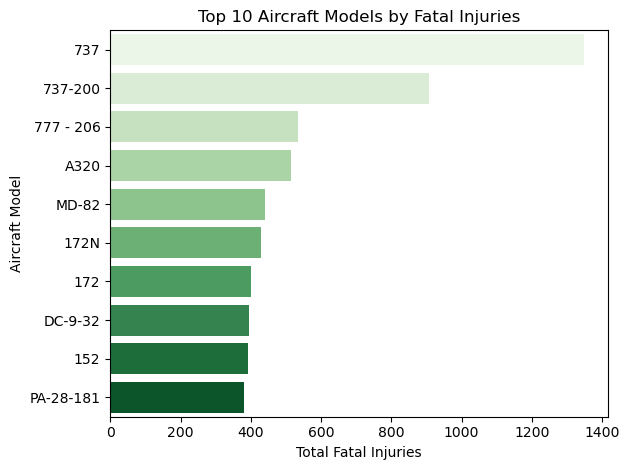

In [212]:
# Group by model and sum fatalities
model_fatalities = df.groupby('Model')['Total.Fatal.Injuries'].sum()

# Get the bottom 10 models (lowest fatalities)
top_models = model_fatalities.sort_values(ascending=False).head(10).reset_index()

# Plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=top_models,
    y='Model',
    x='Total.Fatal.Injuries',
    hue='Model',          # Set hue to Model
    palette='Greens',
    legend=False          # Hide the redundant legend
)
plt.title('Top 10 Aircraft Models by Fatal Injuries')  # ✅ Add chart title
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

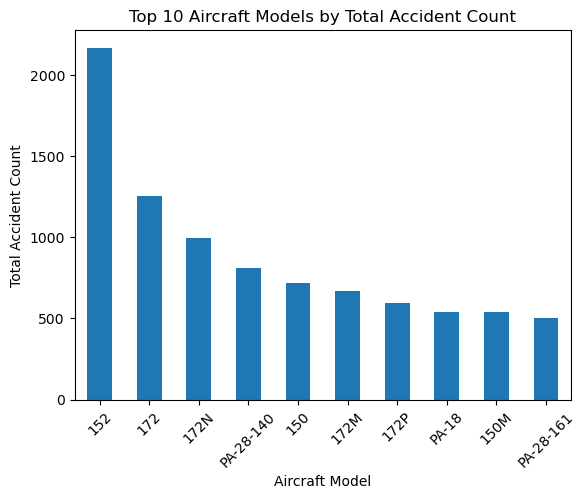

In [225]:
# Visualizing the total accidents per model for the top 10 models
# Plot total accidents per aircraft model
plt.figure(figsize=(12, 6))
risk_summary.sort_values(by='Total.Accident.Count', ascending=False).head(10).plot(kind='bar', x='Model', y='Total.Accident.Count', legend=False)
plt.title('Top 10 Aircraft Models by Total Accident Count')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Accident Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

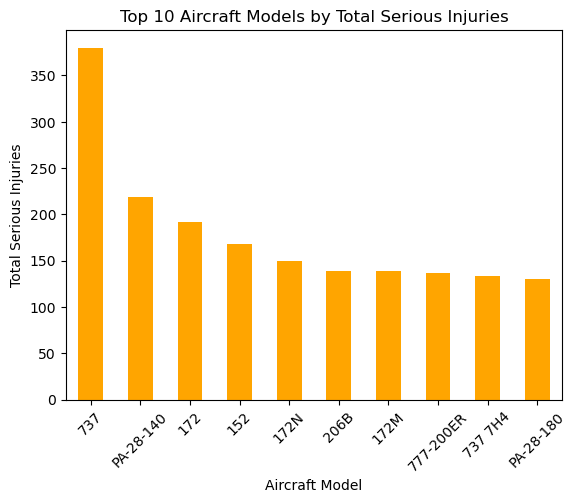

In [215]:
plt.figure(figsize=(12, 6))
safe_aircraft.sort_values(by='Total.Serious.Injuries', ascending=False).head(10).plot(kind='bar', x='Model', y='Total.Serious.Injuries', legend=False, color='orange')
plt.title('Top 10 Aircraft Models by Total Serious Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45)
plt.show()


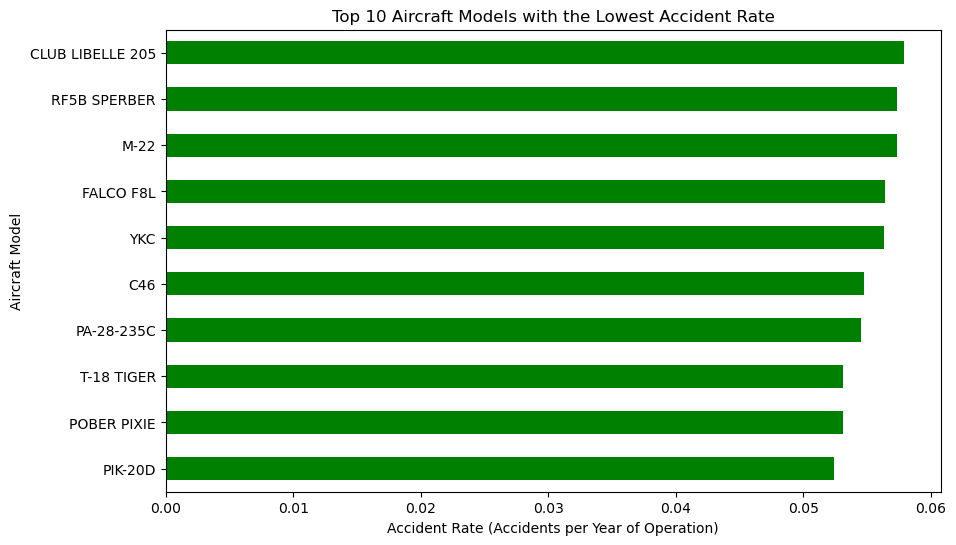

In [217]:
# Plotting the top 10 models with the lowest accident rate
top_10_lowest_accident_rate = sorted_accident_data.head(10)

# Plotting
plt.figure(figsize=(10,6))
top_10_lowest_accident_rate['Accident_Rate'].plot(kind='barh', color='green')
plt.title('Top 10 Aircraft Models with the Lowest Accident Rate')
plt.xlabel('Accident Rate (Accidents per Year of Operation)')
plt.ylabel('Aircraft Model')
plt.show()

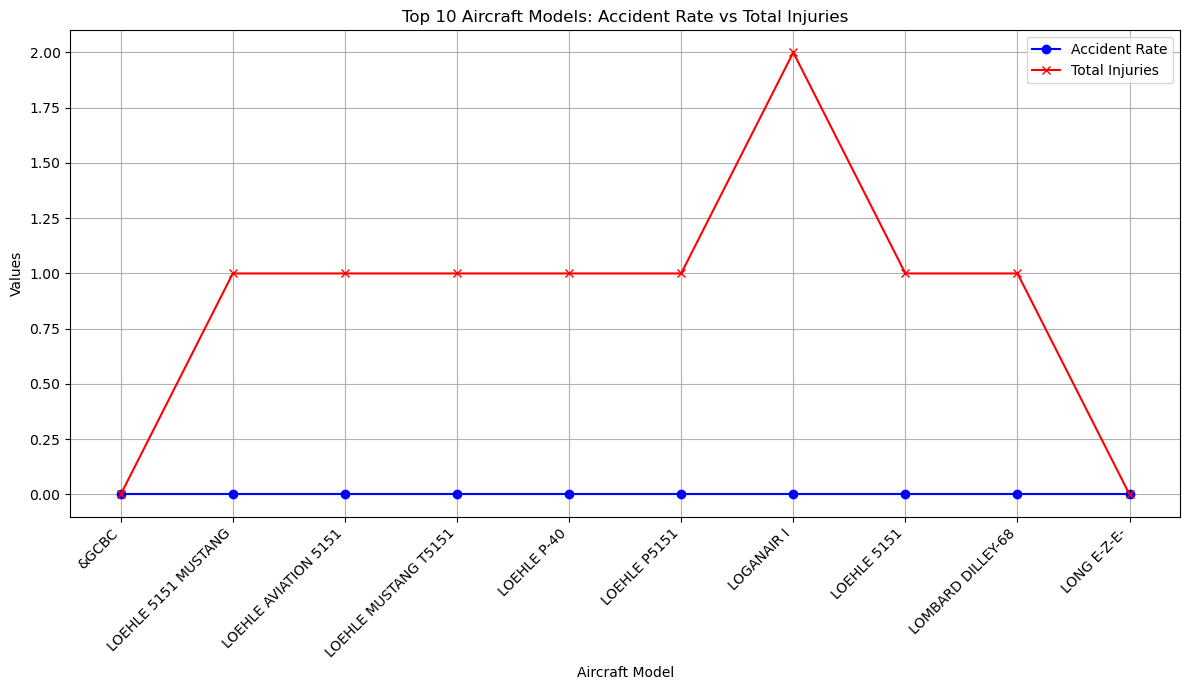

In [223]:
import matplotlib.pyplot as plt

# Top 10 models based on accident rate or any other criterion
top_models = plot_data.head(10)

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot accident rate line
plt.plot(top_models['Model'], top_models['Accident_Rate'], label='Accident Rate', marker='o', color='blue')

# Plot total injuries line
plt.plot(top_models['Model'], top_models['Total.Injuries'], label='Total Injuries', marker='x', color='red')

# Labeling the plot
plt.title('Top 10 Aircraft Models: Accident Rate vs Total Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability
plt.grid(True)

# Add a legend to indicate which line corresponds to what
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Assuming you have your DataFrame as 'df' with the calculated Accident Rate
df.to_csv('AviationData.csv', index=False)

# Recommendations

Based on our analysis, here are some of the recommendations that I would give;
* 